In [ ]:
import pandas as pd

df = pd.read_csv('/content/Telco_customer_churn.csv')
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
# 1. Basic overview
df.shape, df.columns.tolist()

# 2. Check unique values in target column
df['Churn Label'].value_counts()

# 3. Quick statistical summary
df.describe(include='all').T.head(20)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count,7043.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Country,7043,1,United States,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,7043,1,California,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,7043,1129,Los Angeles,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,7043.0,NaN,NaN,NaN,93521.964646,1865.794555,90001.0,92102.0,93552.0,95351.0,96161.0
Lat Long,7043,1652,"34.159534, -116.425984",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,7043.0,NaN,NaN,NaN,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,NaN,NaN,NaN,-119.79888,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Churn Label'].value_counts()
df['Churn Label'].value_counts(normalize=True) * 100


,proportion
Churn Label,
No,73.463013
Yes,26.536987


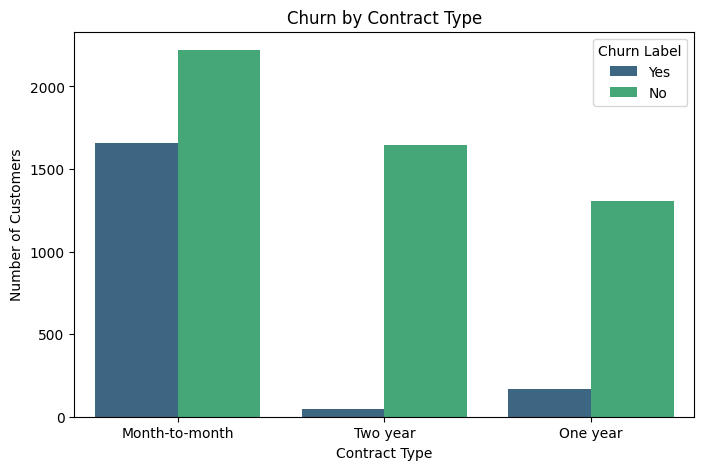

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn Label', palette='viridis')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label', loc='upper right')
plt.show()


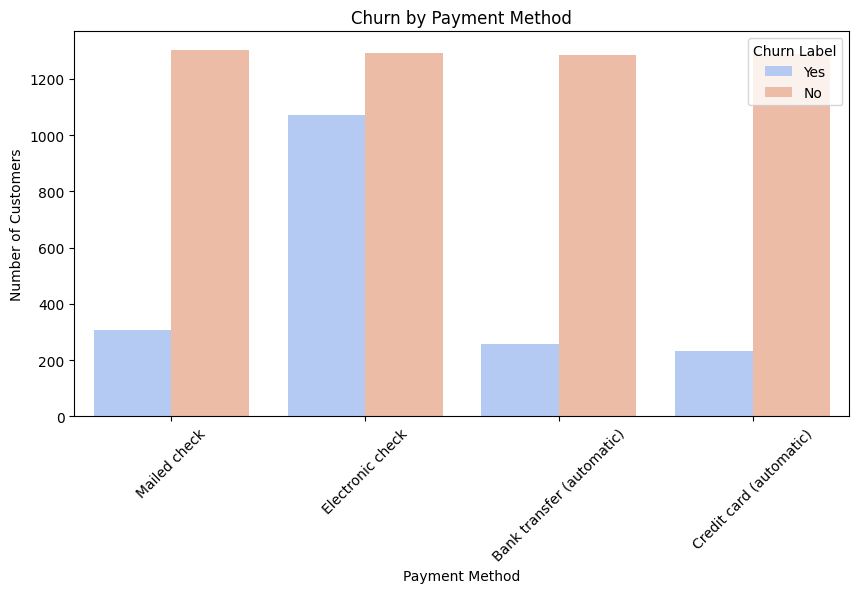

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Payment Method', hue='Churn Label', palette='coolwarm')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label', loc='upper right')
plt.show()


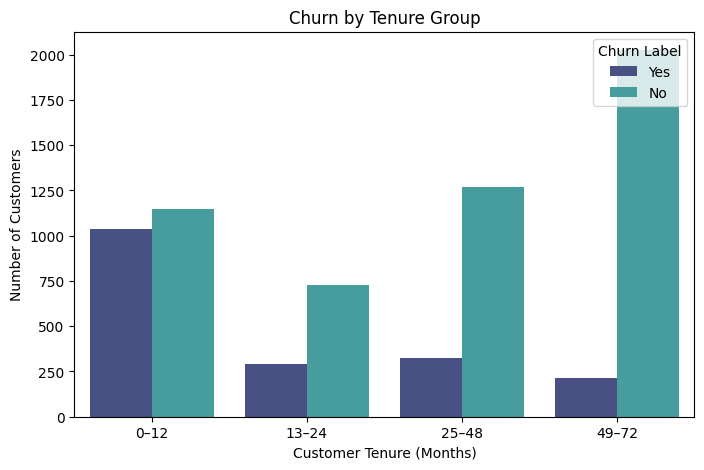

In [ ]:
# Create tenure groups
bins = [0, 12, 24, 48, 72]
labels = ['0–12', '13–24', '25–48', '49–72']
df['Tenure Group'] = pd.cut(df['Tenure Months'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Tenure Group', hue='Churn Label', palette='mako')
plt.title('Churn by Tenure Group')
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label', loc='upper right')
plt.show()


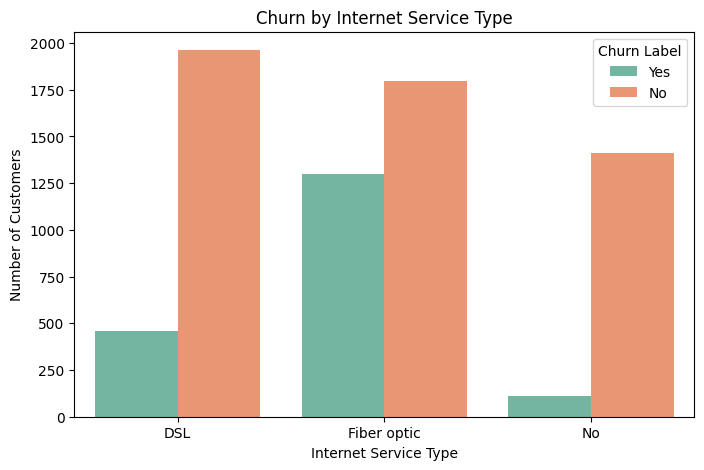

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Internet Service', hue='Churn Label', palette='Set2')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label', loc='upper right')
plt.show()


In [ ]:
# Select relevant features (dropping IDs and location-based columns)
df_ml = df.drop(columns=[
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
    'Lat Long', 'Latitude', 'Longitude', 'Churn Reason'  # drop unneeded or empty
])

# Convert 'Total Charges' to numeric (it may have spaces or text)
df_ml['Total Charges'] = pd.to_numeric(df_ml['Total Charges'], errors='coerce')

# Fill missing values (if any after conversion)
df_ml['Total Charges'] = df_ml['Total Charges'].fillna(df_ml['Total Charges'].median())

# Encode categorical variables
df_ml_encoded = pd.get_dummies(df_ml, drop_first=True)

# Check the final shape
df_ml_encoded.shape


(7043, 37)

In [ ]:
# Export the processed dataset for Power BI
df_ml_encoded.to_csv('processed_telco_data.csv', index=False)

# Download the file to your local system
from google.colab import files
files.download('processed_telco_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_ml_encoded.drop('Churn Label_Yes', axis=1)
y = df_ml_encoded['Churn Label_Yes']

# Split into train and test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((5634, 36), (1409, 36))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1035
        True       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Confusion Matrix:
 [[1035    0]
 [   0  374]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Drop data leakage columns
cols_to_drop = ['Churn Value', 'Churn Score', 'CLTV']
df_clean = df_ml_encoded.drop(columns=[c for c in cols_to_drop if c in df_ml_encoded.columns])

# Split again
X = df_clean.drop('Churn Label_Yes', axis=1)
y = df_clean['Churn Label_Yes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train again
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7998580553584103

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.89      0.87      1035
        True       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[923 112]
 [170 204]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.7927608232789212

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.89      0.86      1035
        True       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Confusion Matrix:
 [[923 112]
 [180 194]]


/tmp/ipython-input-3611896545.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')


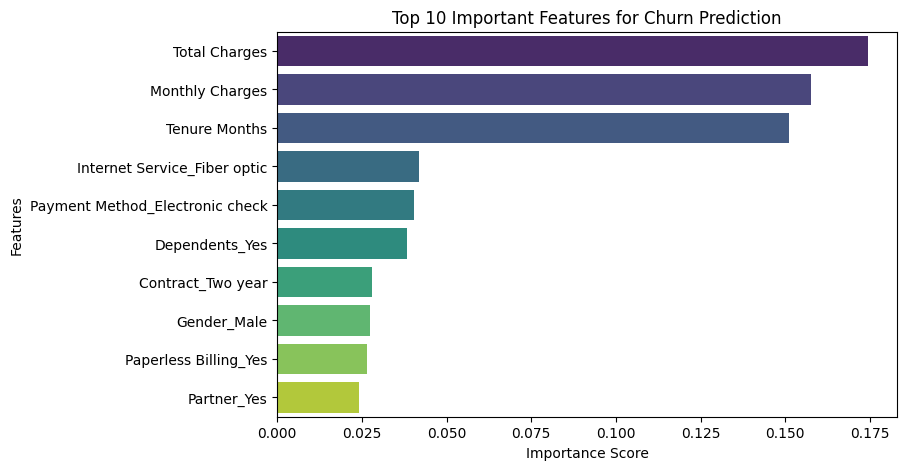

In [ ]:
import numpy as np

# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Display top 10 features
top_features = X.columns[indices[:10]]
top_importances = importances[indices[:10]]

plt.figure(figsize=(8,5))
sns.barplot(x=top_importances, y=top_features, palette='viridis')
plt.title('Top 10 Important Features for Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
